##Done By CS20B1057 A S V Dhanush
##ASBD LAB MIDSEM

###Dataset : Credit Approval Data Set
Dataset Link: https://archive.ics.uci.edu/ml/datasets/Credit+Approval

**Algorithm 1: Test drive DIC algorithm to generate association rules satisfying minimum support and confidence**

**Algorithm 2: Test drive Apriori algorithm to generate association rules satisfying minimum support and confidence**


NOTE : I have done the Apriori part first and then DIC algorithm

Note : Since the .data file is given. I have taken the .csv file from the UCL repository
Dataset link : https://archive.ics.uci.edu/static/public/27/data.csv

In [67]:
#Importing libraries
import pandas as pd
import numpy as np
import mlxtend
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####Printing the meta data and description about the dataset

In [68]:
!pip install ucimlrepo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####Converting the .data file to a .csv file

In [69]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
credit_approval = fetch_ucirepo(id=27)

# data (as pandas dataframes)
X = credit_approval.data.features
y = credit_approval.data.targets

# metadata
credit_approval.metadata

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'uci_id': 27,
 'name': 'Credit Approval',
 'repository_url': 'https://archive.ics.uci.edu/dataset/27/credit+approval',
 'data_url': 'https://archive.ics.uci.edu/static/public/27/data.csv',
 'abstract': 'This data concerns credit card applications; good mix of attributes',
 'area': 'Business',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 690,
 'num_features': 15,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': [],
 'target_col': ['A16'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1987,
 'last_updated': 'Wed Aug 23 2023',
 'dataset_doi': '10.24432/C5FS30',
 'creators': ['J. R. Quinlan'],
 'intro_paper': None,
 'additional_info': {'summary': 'This file concerns credit card applications.  All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data.\r\n  \r\nThis dataset is interesting because there is a good

In [70]:
dataset_url = 'https://archive.ics.uci.edu/static/public/27/data.csv'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
df = pd.read_csv(dataset_url)
print(df.shape)
df.head()
df_copy = df.copy(deep = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(690, 16)


In [72]:
df.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

#***DATA CLEANING***

In [73]:
#checking if missing values exist
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

###Since we dont know what exactly the values imply we remove the nan entries from the dataset

#***DATA VISUALISATION AND PRE PROCESSING***

In [74]:
df_without_na = df.dropna()
df_without_na.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(653, 16)

###Converting the dataframe into a transactional database

###1)Here we are converting the float and int values into 1s and 0s format by using the means of their respective columns (for FLOAT and INT columns) as threshold.

Values > threshold will be put as '1' and less will be put as '0'
###2)Peforming one hot encoding to First and last column as they have only 2 symbols in common

###3) For float and int datatype encoding is done based on mean
if values > mean , we put '1' else we put '0'


####There exists missing values (NaN), Hence we need to pre process the data

In [75]:

# Now you have a preprocessed dataframe
print(df_without_na.head())


  A1     A2     A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15 A16
0  b  30.83  0.000  u  g  w  v  1.25  t   t    1   f   g  202.0    0   +
1  a  58.67  4.460  u  g  q  h  3.04  t   t    6   f   g   43.0  560   +
2  a  24.50  0.500  u  g  q  h  1.50  t   f    0   f   g  280.0  824   +
3  b  27.83  1.540  u  g  w  v  3.75  t   t    5   t   g  100.0    3   +
4  b  20.17  5.625  u  g  w  v  1.71  t   f    0   f   s  120.0    0   +


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####There exists 12 in A1 and A2 attribute,6 in A4,A5 attributes,9 in A6,A7 and 13 missing values in A15 attribute

In [76]:
cols = df_without_na.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####Bar plot for counting symbols in different columns of the dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


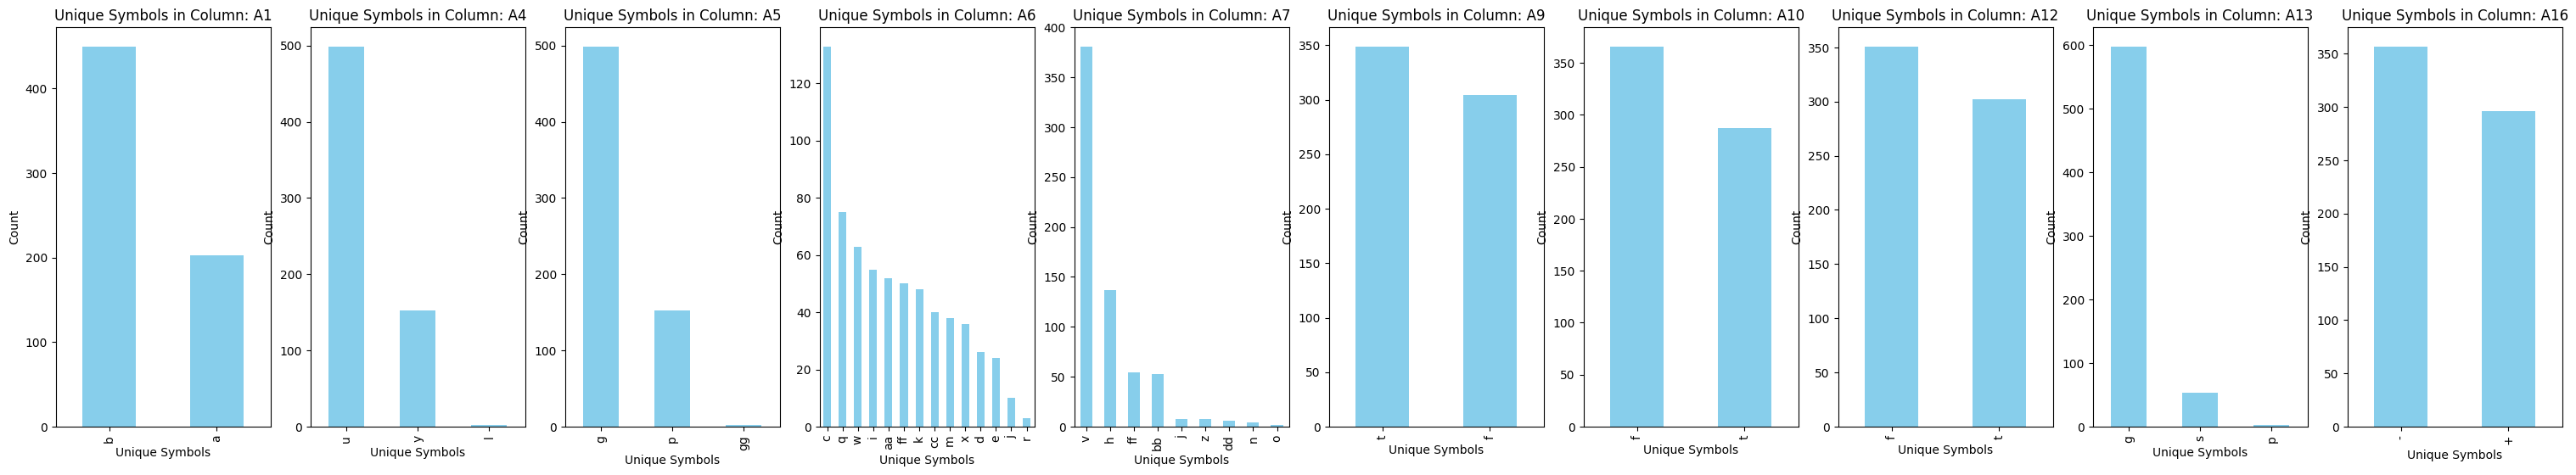

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

non_numeric_cols = df_without_na.select_dtypes(exclude=['int64', 'float64']).columns

symbol_counts = {}
for col in non_numeric_cols:
    symbols = df_without_na[col].value_counts()
    symbol_counts[col] = symbols

num_cols = len(symbol_counts)
fig, axes = plt.subplots(1, num_cols, figsize=(3*num_cols, 5))
fig.tight_layout(pad=0.0)

for i, (col, value_counts) in enumerate(symbol_counts.items()):
    value_counts.plot(kind='bar', ax=axes[i], color='skyblue')
    axes[i].set_title(f'Unique Symbols in Column: {col}')
    axes[i].set_xlabel('Unique Symbols')
    axes[i].set_ylabel('Count')

plt.show()


####Plotting the count for number of '+' and '-' occurances

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


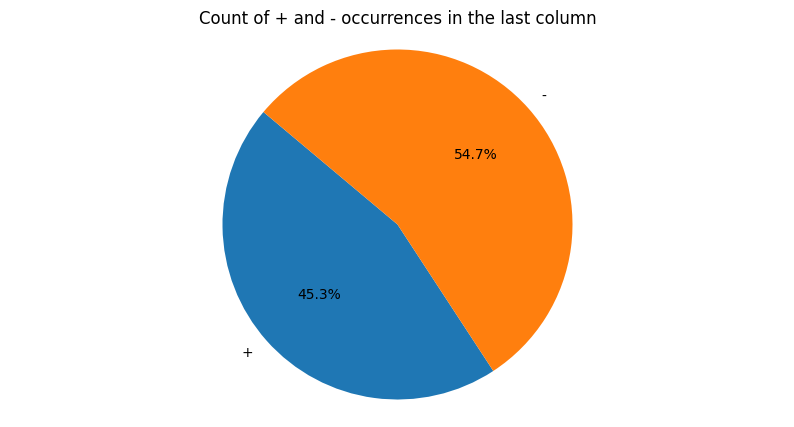

In [79]:
last_column = df_without_na.iloc[:, -1]

# Count occurrences of '+' and '-'
plus_count = (last_column == '+').sum()
minus_count = (last_column == '-').sum()

# Data for pie chart
counts = [plus_count, minus_count]
labels = ['+', '-']

# Create pie chart
plt.figure(figsize=(10, 5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Count of + and - occurrences in the last column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

####Plotting Heat Map  To check the correlation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-80-55fe505e4613>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df_without_na.corr()  # for a correlation matrix of our DataFrame '


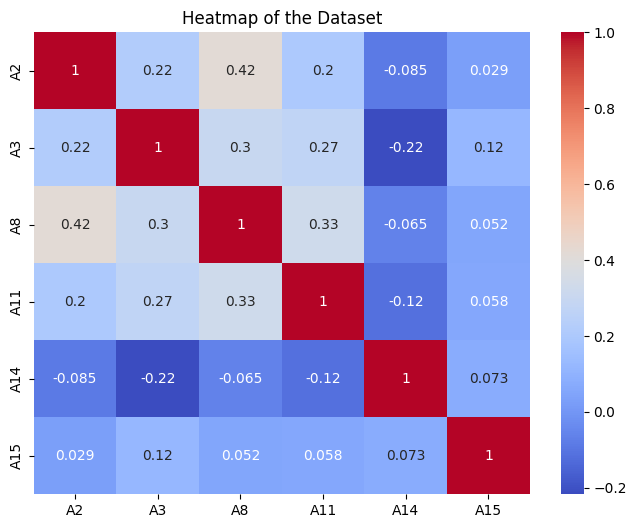

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df_without_na.corr()  # for a correlation matrix of our DataFrame '

plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title('Heatmap of the Dataset')
plt.show()


Violin Plots

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


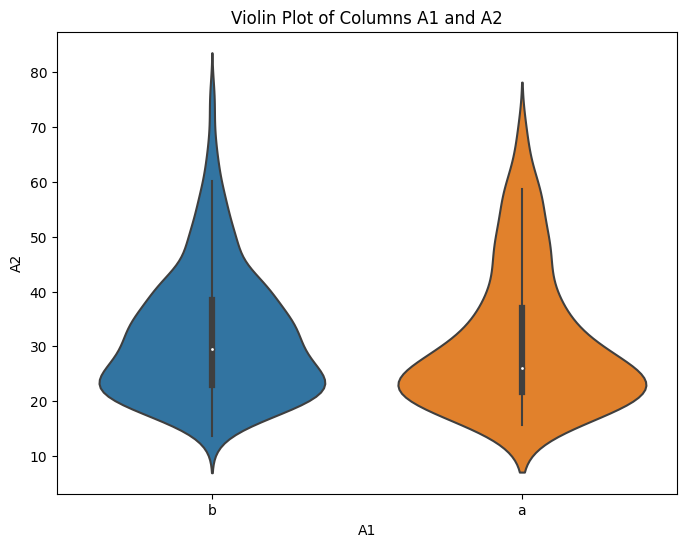

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.violinplot(x='A1', y='A2', data=df_without_na)
plt.title('Violin Plot of Columns A1 and A2')
plt.show()
plt.figure(figsize=(8, 6))


Histogram Plot for all the columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


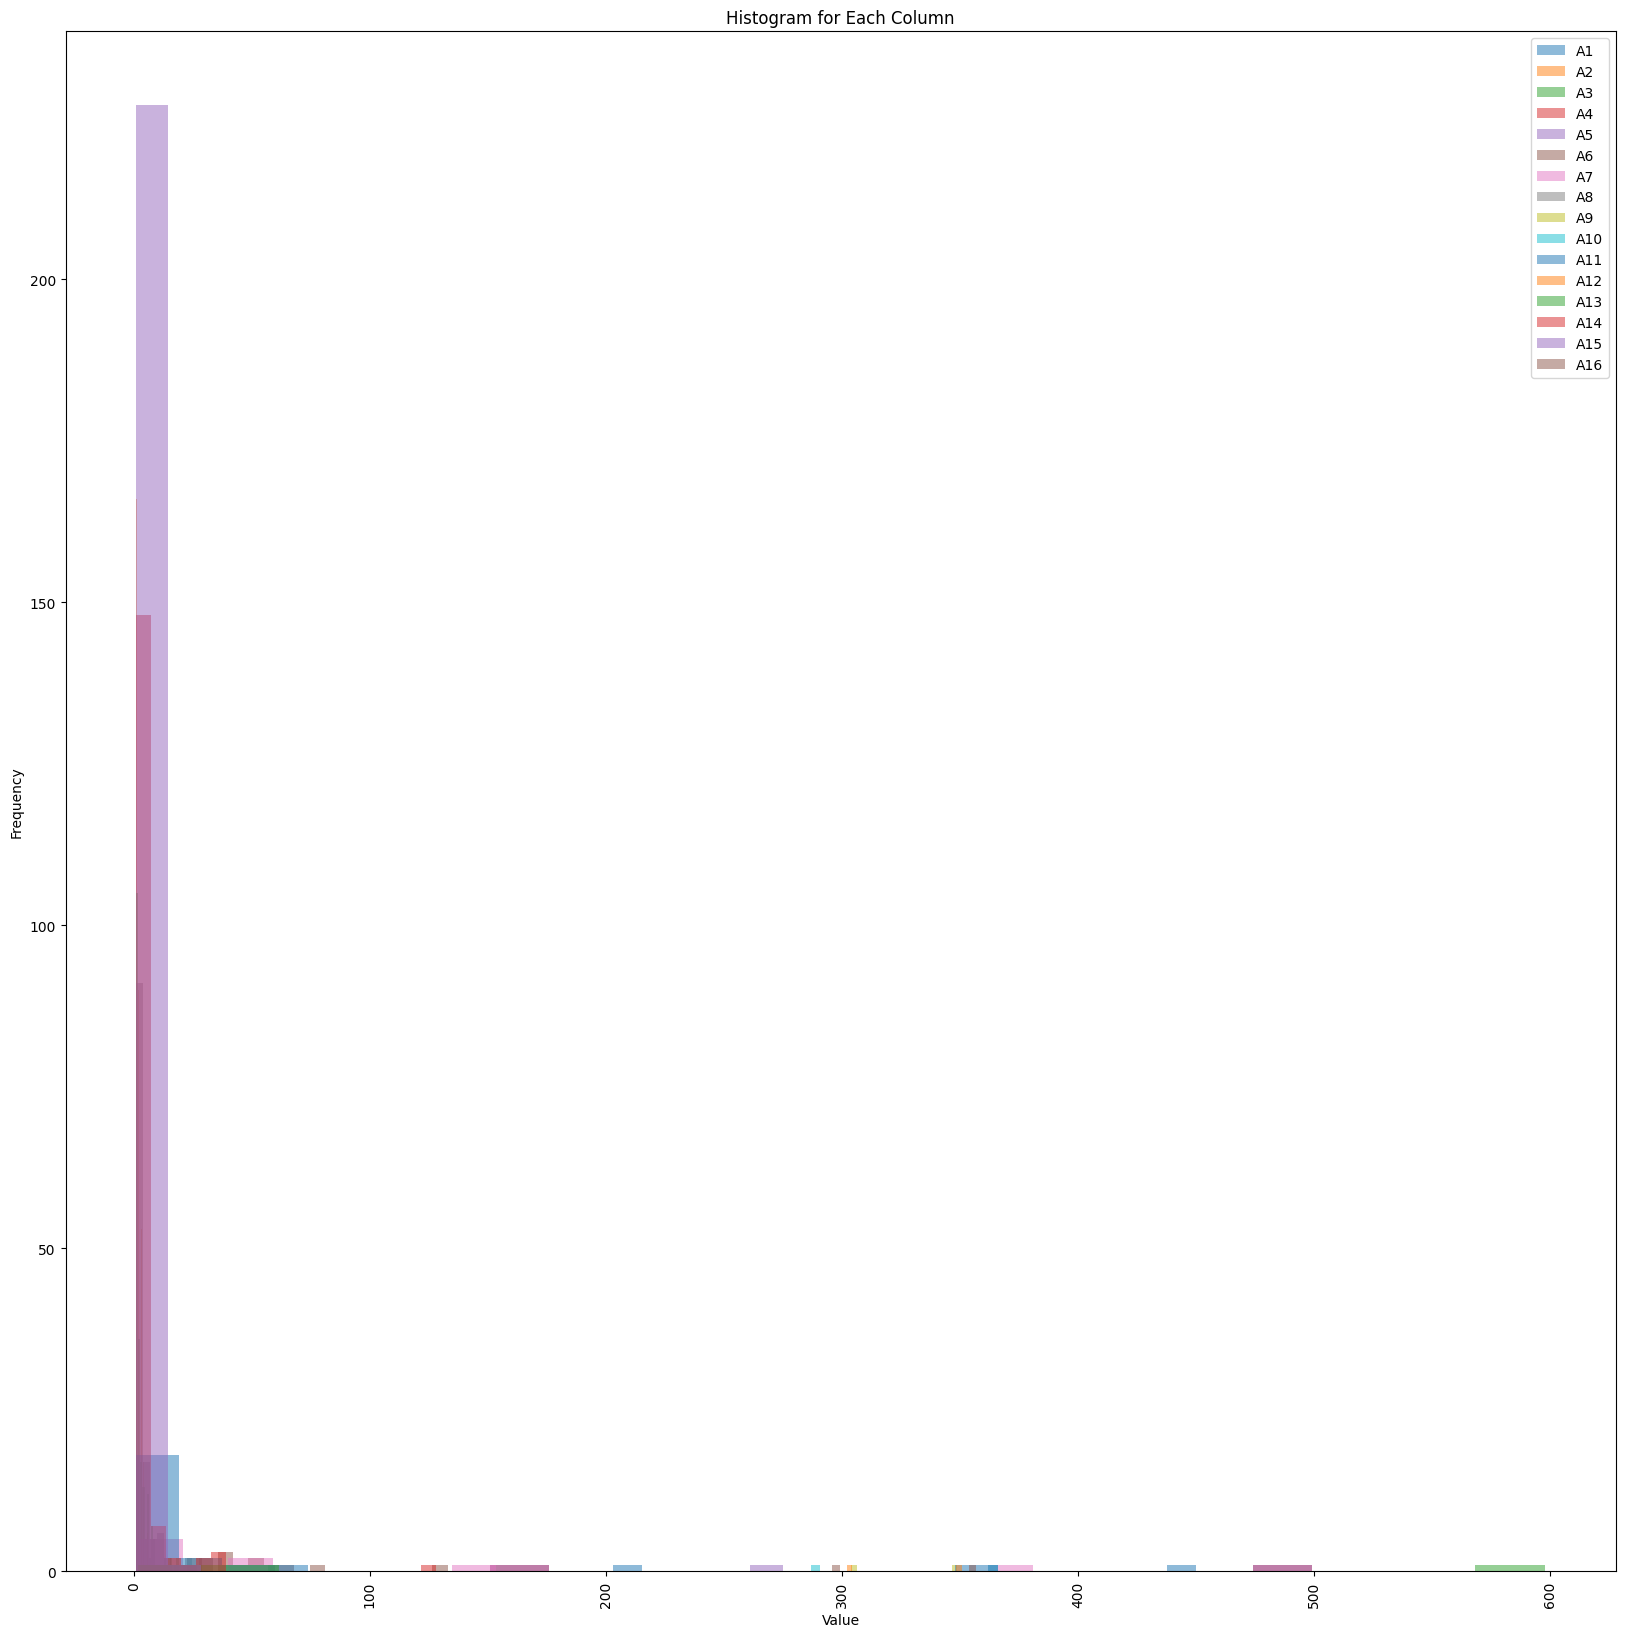

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))  # Increase the figure size
for column in df_without_na.columns:
    plt.hist(df_without_na[column].value_counts(), bins=20, alpha=0.5, label=column)

plt.legend()
plt.title('Histogram for Each Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')  # Rotate x-axis labels
plt.show()

###Transaction Database Construction

In [83]:
import pandas as pd

# One-hot encode the first column (A1)
encoded_first_column = pd.get_dummies(df_without_na['A1'], prefix='A1')

# One-hot encode the last column (A16)
encoded_last_column = pd.get_dummies(df_without_na['A16'], prefix='A16')

# Concatenate the encoded columns to the original DataFrame
df_encoded = pd.concat([encoded_first_column, df_without_na.iloc[:, 1:-1], encoded_last_column], axis=1)

# Display the resulting DataFrame
print(df_encoded)



     A1_a  A1_b     A2      A3 A4 A5  A6  A7    A8 A9 A10  A11 A12 A13    A14  \
0       0     1  30.83   0.000  u  g   w   v  1.25  t   t    1   f   g  202.0   
1       1     0  58.67   4.460  u  g   q   h  3.04  t   t    6   f   g   43.0   
2       1     0  24.50   0.500  u  g   q   h  1.50  t   f    0   f   g  280.0   
3       0     1  27.83   1.540  u  g   w   v  3.75  t   t    5   t   g  100.0   
4       0     1  20.17   5.625  u  g   w   v  1.71  t   f    0   f   s  120.0   
..    ...   ...    ...     ... .. ..  ..  ..   ... ..  ..  ...  ..  ..    ...   
685     0     1  21.08  10.085  y  p   e   h  1.25  f   f    0   f   g  260.0   
686     1     0  22.67   0.750  u  g   c   v  2.00  f   t    2   t   g  200.0   
687     1     0  25.25  13.500  y  p  ff  ff  2.00  f   t    1   t   g  200.0   
688     0     1  17.92   0.205  u  g  aa   v  0.04  f   f    0   f   g  280.0   
689     0     1  35.00   3.375  u  g   c   h  8.29  f   f    0   t   g    0.0   

     A15  A16_+  A16_-  
0 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###Finding unique character items in each column


In [84]:
object_cols = df_encoded.select_dtypes(include=['object']).columns
unique_symbols_dict = {}
for col in object_cols:
    if col!= 'A1' or col != 'A16':
      unique_symbols_dict[col] = df_encoded[col].unique()

for col, unique_values in unique_symbols_dict.items():
    print(f"Unique values in column {col}: {unique_values}")
# Display unique symbols

unique_symbols = set()

for symbols_array in unique_symbols_dict.values():
    unique_symbols.update(symbols_array)

unique_vals = list(unique_symbols)
print("Unique symbols across specified keys:", unique_vals)
len(unique_vals)

Unique values in column A4: ['u' 'y' 'l']
Unique values in column A5: ['g' 'p' 'gg']
Unique values in column A6: ['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j']
Unique values in column A7: ['v' 'h' 'bb' 'ff' 'j' 'z' 'o' 'dd' 'n']
Unique values in column A9: ['t' 'f']
Unique values in column A10: ['t' 'f']
Unique values in column A12: ['f' 't']
Unique values in column A13: ['g' 's' 'p']
Unique symbols across specified keys: ['gg', 'x', 'n', 'l', 'dd', 'g', 'o', 'f', 's', 'j', 'i', 'r', 'p', 't', 'z', 'cc', 'k', 'h', 'e', 'bb', 'c', 'q', 'aa', 'v', 'u', 'ff', 'y', 'd', 'w', 'm']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


30

###Box plots cannot be plotted for this as the data is cannot be properly obsereved as it consists of only symbols and some integer and floating point number which we dont know about


##Normalization is not necessary for this dataset

#***TRANSFORMATION***

In [85]:
import pandas as pd

# Columns to be one-hot encoded (excluding 'A1' and 'A16' columns and float columns)
columns_to_encode = ['A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

# Perform one-hot encoding for the specified columns
df_encoded1 = pd.get_dummies(df_encoded, columns=columns_to_encode, drop_first=True)

# Display the resulting DataFrame
print(df_encoded1)



     A1_a  A1_b     A2      A3    A8  A11    A14  A15  A16_+  A16_-  ...  \
0       0     1  30.83   0.000  1.25    1  202.0    0      1      0  ...   
1       1     0  58.67   4.460  3.04    6   43.0  560      1      0  ...   
2       1     0  24.50   0.500  1.50    0  280.0  824      1      0  ...   
3       0     1  27.83   1.540  3.75    5  100.0    3      1      0  ...   
4       0     1  20.17   5.625  1.71    0  120.0    0      1      0  ...   
..    ...   ...    ...     ...   ...  ...    ...  ...    ...    ...  ...   
685     0     1  21.08  10.085  1.25    0  260.0    0      0      1  ...   
686     1     0  22.67   0.750  2.00    2  200.0  394      0      1  ...   
687     1     0  25.25  13.500  2.00    1  200.0    1      0      1  ...   
688     0     1  17.92   0.205  0.04    0  280.0  750      0      1  ...   
689     0     1  35.00   3.375  8.29    0    0.0    0      0      1  ...   

     A7_j  A7_n  A7_o  A7_v  A7_z  A9_t  A10_t  A12_t  A13_p  A13_s  
0       0     0  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
int_cols = ['A2', 'A3', 'A8', 'A14']
float_cols = ['A11','A15']

int_mean = df[int_cols].mean()
float_mean = df[float_cols].mean()

# Encode integer columns based on mean
df_encoded1[int_cols] = (df_encoded1[int_cols] > int_mean).astype(int)

# Encode float columns based on mean
df_encoded1[float_cols] = (df_encoded1[float_cols] > float_mean).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
df_encoded1
# df_encoded1.to_csv('encoded_data1.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,A1_a,A1_b,A2,A3,A8,A11,A14,A15,A16_+,A16_-,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
1,1,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,1,1,0,0
4,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
686,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
687,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
688,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


###We have got the final database, Now let us change the column names for much more easier reference

In [88]:
# Create a dictionary to map the original column names to numbers
column_numbers = {col: f'{i+1}' for i, col in enumerate(df_encoded1.columns)}
# Assuming 'df' is your DataFrame


# Rename the columns using the created dictionary
transaction_db = df_encoded1.rename(columns=column_numbers)
custom_index_values = ['T' + str(i) for i in range(1, len(transaction_db) + 1)]

# Set the custom index
transaction_db.index = custom_index_values
transaction_db

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
T1,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
T2,1,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
T3,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
T4,0,1,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,1,1,0,0
T5,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T649,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
T650,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
T651,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0
T652,0,1,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [89]:
#converting to csv
transaction_db.to_csv('transaction_database.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###**The Final Transaction Database has 653 Transactions with 40 items**

###Let us now fetch the list of items containing in each transaction in the database

In [90]:
transaction_list = []

for index, row in transaction_db.iterrows():
    transaction = [col for col in transaction_db.columns if row[col] == 1]
    transaction_list.append(transaction)

# Showing the transaction containing the items with '1'
for i, transaction in enumerate(transaction_list, 1):
    print(f"Transaction {i}: {transaction}")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Transaction 1: ['2', '7', '9', '11', '26', '34', '36', '37']
Transaction 2: ['1', '3', '5', '6', '9', '11', '24', '30', '36', '37']
Transaction 3: ['1', '7', '9', '11', '24', '30', '36']
Transaction 4: ['2', '5', '6', '9', '11', '26', '34', '36', '37', '38']
Transaction 5: ['2', '4', '9', '11', '26', '34', '36', '40']
Transaction 6: ['2', '3', '5', '7', '9', '11', '23', '34', '36', '38']
Transaction 7: ['2', '3', '5', '8', '9', '11', '25', '30', '36', '38']
Transaction 8: ['1', '4', '8', '9', '11', '16', '34', '36']
Transaction 9: ['2', '3', '5', '9', '12', '14', '22', '30', '36']
Transaction 10: ['2', '3', '4', '5', '8', '9', '12', '14', '26', '34', '36', '38']
Transaction 11: ['2', '9', '11', '15', '30', '38']
Transaction 12: ['2', '5', '7', '9', '11', '15', '30', '36']
Transaction 13: ['1', '3', '4', '9', '11', '22', '34', '36', '38']
Transaction 14: ['2', '3', '4', '8', '9', '11', '22', '34']
Transaction 15: ['1', '3', '4', '5', '6', '9', '11', '24', '34', '36', '37', '38']
Transac

In [91]:
transactions_set = [set(transaction) for transaction in transaction_list]
transactions_set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'11', '2', '26', '34', '36', '37', '7', '9'},
 {'1', '11', '24', '3', '30', '36', '37', '5', '6', '9'},
 {'1', '11', '24', '30', '36', '7', '9'},
 {'11', '2', '26', '34', '36', '37', '38', '5', '6', '9'},
 {'11', '2', '26', '34', '36', '4', '40', '9'},
 {'11', '2', '23', '3', '34', '36', '38', '5', '7', '9'},
 {'11', '2', '25', '3', '30', '36', '38', '5', '8', '9'},
 {'1', '11', '16', '34', '36', '4', '8', '9'},
 {'12', '14', '2', '22', '3', '30', '36', '5', '9'},
 {'12', '14', '2', '26', '3', '34', '36', '38', '4', '5', '8', '9'},
 {'11', '15', '2', '30', '38', '9'},
 {'11', '15', '2', '30', '36', '5', '7', '9'},
 {'1', '11', '22', '3', '34', '36', '38', '4', '9'},
 {'11', '2', '22', '3', '34', '4', '8', '9'},
 {'1', '11', '24', '3', '34', '36', '37', '38', '4', '5', '6', '9'},
 {'12', '14', '2', '22', '3', '34', '36', '37', '38', '6', '7', '9'},
 {'11', '2', '23', '34', '36', '37', '38', '6', '7', '9'},
 {'1', '11', '24', '34', '36', '37', '4', '5', '6', '9'},
 {'11', '17', '2', '3

##**ii) Apriori Algorithm**


###It goes upto L6 (6 frequent itemset) when min confidence = 0.1

In [111]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets1 = apriori(transaction_db, min_support=0.1, use_colnames=True) #using apriori function

print(frequent_itemsets1)

      support                itemsets
0    0.310873                     (1)
1    0.689127                     (2)
2    0.416539                     (3)
3    0.364472                     (4)
4    0.309342                     (5)
..        ...                     ...
542  0.134763   (11, 9, 36, 2, 37, 6)
543  0.116386   (3, 11, 9, 36, 37, 6)
544  0.125574   (11, 9, 4, 36, 37, 6)
545  0.120980   (11, 9, 36, 37, 5, 6)
546  0.113323  (11, 9, 36, 37, 34, 6)

[547 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


####Hence we can see that the algorithm has gone upto L3 (3 freuquent items) when min confidence = 0.2

In [93]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets2 = apriori(transaction_db, min_support=0.2, use_colnames=True) #using apriori function
print(frequent_itemsets2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support            itemsets
0    0.310873                 (1)
1    0.689127                 (2)
2    0.416539                 (3)
3    0.364472                 (4)
4    0.309342                 (5)
..        ...                 ...
110  0.205207      (11, 9, 37, 6)
111  0.232772      (37, 9, 36, 6)
112  0.217458     (11, 37, 36, 6)
113  0.264931     (11, 37, 9, 36)
114  0.205207  (11, 9, 36, 37, 6)

[115 rows x 2 columns]


####Here we can see that the algorithm has gone upto L3 (3 freuquent items) when min confidence = 0.3

In [110]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets3 = apriori(transaction_db, min_support=0.3, use_colnames=True) #using apriori function
print(frequent_itemsets3)

     support     itemsets
0   0.310873          (1)
1   0.689127          (2)
2   0.416539          (3)
3   0.364472          (4)
4   0.309342          (5)
5   0.399694          (7)
6   0.453292          (9)
7   0.546708         (10)
8   0.764165         (11)
9   0.583461         (34)
10  0.534456         (36)
11  0.439510         (37)
12  0.462481         (38)
13  0.307810       (3, 2)
14  0.307810       (9, 2)
15  0.381317      (2, 10)
16  0.514548      (11, 2)
17  0.421133      (2, 34)
18  0.362940      (36, 2)
19  0.330781      (38, 2)
20  0.332312      (3, 11)
21  0.303216      (11, 4)
22  0.310873      (11, 7)
23  0.381317      (11, 9)
24  0.425727      (9, 36)
25  0.310873      (37, 9)
26  0.382848     (11, 10)
27  0.333844     (10, 34)
28  0.453292     (11, 34)
29  0.436447     (11, 36)
30  0.372129     (11, 37)
31  0.352221     (11, 38)
32  0.341501     (37, 36)
33  0.312404  (11, 2, 34)
34  0.362940  (11, 9, 36)
35  0.309342  (37, 9, 36)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


##**Association Rules**

####For Min Confidence = 0.3, For Min Threshold = 0.8 (80%)

In [95]:
#Association rule mining
rules1 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.8)

# Show the association rules
print(rules1)

   antecedents consequents  antecedent support  consequent support   support  \
0          (4)        (11)            0.364472            0.764165  0.303216   
1          (9)        (11)            0.453292            0.764165  0.381317   
2          (9)        (36)            0.453292            0.534456  0.425727   
3         (36)        (11)            0.534456            0.764165  0.436447   
4         (37)        (11)            0.439510            0.764165  0.372129   
5      (11, 9)        (36)            0.381317            0.534456  0.362940   
6     (11, 36)         (9)            0.436447            0.453292  0.362940   
7      (9, 36)        (11)            0.425727            0.764165  0.362940   
8          (9)    (11, 36)            0.453292            0.436447  0.362940   
9      (37, 9)        (36)            0.310873            0.534456  0.309342   
10    (37, 36)         (9)            0.341501            0.453292  0.309342   

    confidence      lift  leverage  con

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####For Min Confidence = 0.3, For Min Threshold = 0.7 (70%)

In [96]:
rules2 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.7)
# Show the association rules
print(rules2)

    antecedents      consequents  antecedent support  consequent support  \
0           (1)             (11)            0.310873            0.764165   
1           (3)              (2)            0.416539            0.689127   
2           (5)              (2)            0.309342            0.689127   
3           (7)              (2)            0.399694            0.689127   
4           (2)             (11)            0.689127            0.764165   
..          ...              ...                 ...                 ...   
156     (11, 6)      (37, 9, 36)            0.234303            0.309342   
157      (9, 6)     (11, 37, 36)            0.232772            0.287902   
158     (36, 6)      (11, 9, 37)            0.251149            0.266462   
159     (37, 6)      (11, 9, 36)            0.269525            0.362940   
160         (6)  (11, 37, 9, 36)            0.269525            0.264931   

      support  confidence      lift  leverage  conviction  zhangs_metric  
0    0.24961

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####For Min Confidence = 0.3, For Min Threshold = 0.6 (60%)


In [97]:
rules3 = association_rules(frequent_itemsets3, metric="confidence", min_threshold=0.6)
# Show the association rules
print(rules2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    antecedents      consequents  antecedent support  consequent support  \
0           (1)             (11)            0.310873            0.764165   
1           (3)              (2)            0.416539            0.689127   
2           (5)              (2)            0.309342            0.689127   
3           (7)              (2)            0.399694            0.689127   
4           (2)             (11)            0.689127            0.764165   
..          ...              ...                 ...                 ...   
156     (11, 6)      (37, 9, 36)            0.234303            0.309342   
157      (9, 6)     (11, 37, 36)            0.232772            0.287902   
158     (36, 6)      (11, 9, 37)            0.251149            0.266462   
159     (37, 6)      (11, 9, 36)            0.269525            0.362940   
160         (6)  (11, 37, 9, 36)            0.269525            0.264931   

      support  confidence      lift  leverage  conviction  zhangs_metric  
0    0.24961

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


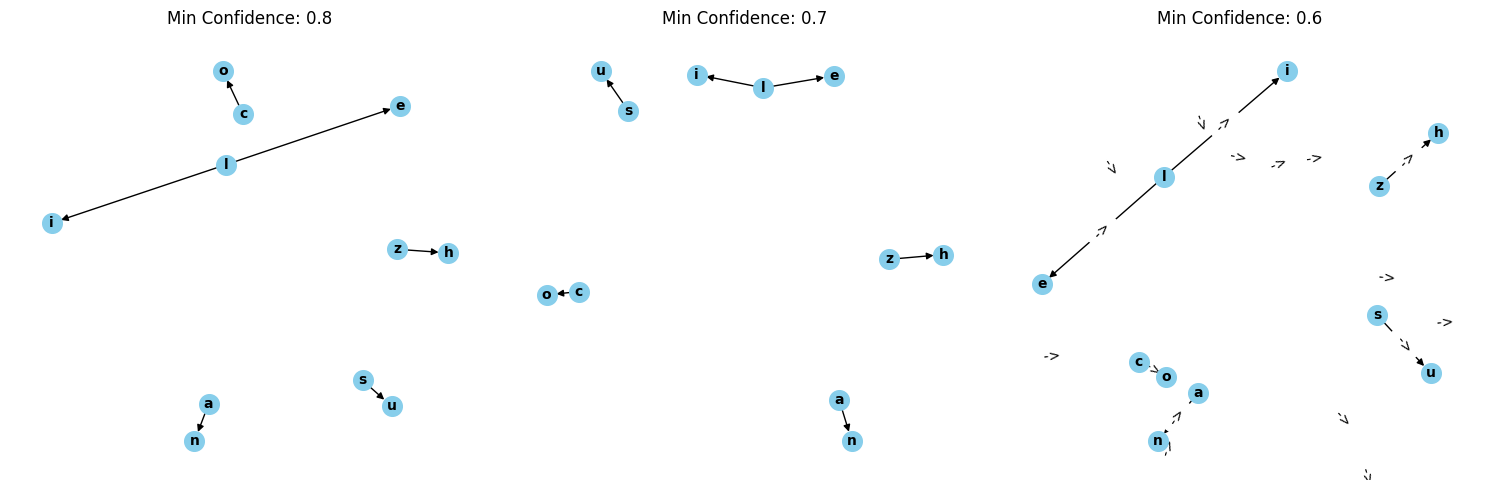

In [98]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_association_rules(rules, min_confidence, ax):
    G = nx.DiGraph()

    for rule in rules:
        G.add_node(', '.join(rule[0]))
        G.add_node(', '.join(rule[1]))
        G.add_edge(', '.join(rule[0]), ', '.join(rule[1]), label=' -> ')

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_weight='bold', font_size=10, ax=ax)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    ax.set_title(f"Min Confidence: {min_confidence}")

# Create subplots for each confidence level
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for min threshold 0.8
plot_association_rules(rules1, 0.8, axs[0])

# Plot for min threshold 0.7
plot_association_rules(rules2, 0.7, axs[1])

# Plot for min threshold 0.6
plot_association_rules(rules3, 0.6, axs[2])

plt.tight_layout()
plt.show()

####1-Frequent Itemset (L1)

In [99]:
L1 = frequent_itemsets1[frequent_itemsets1['itemsets'].apply(lambda x: len(x)) == 1]                        #min support = 0.3
one_frequent= L1['itemsets']
one_frequent = [set(item) for item in one_frequent]
print(one_frequent)

L2 = frequent_itemsets1[frequent_itemsets1['itemsets'].apply(lambda x: len(x)) == 2]
two_frequent= L2['itemsets']
two_frequent = [set(item) for item in two_frequent]
print(two_frequent)

[{'1'}, {'2'}, {'3'}, {'4'}, {'5'}, {'7'}, {'9'}, {'10'}, {'11'}, {'34'}, {'36'}, {'37'}, {'38'}]
[{'3', '2'}, {'9', '2'}, {'2', '10'}, {'11', '2'}, {'2', '34'}, {'36', '2'}, {'38', '2'}, {'3', '11'}, {'11', '4'}, {'11', '7'}, {'11', '9'}, {'9', '36'}, {'37', '9'}, {'11', '10'}, {'10', '34'}, {'11', '34'}, {'11', '36'}, {'11', '37'}, {'11', '38'}, {'37', '36'}]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##**i) DIC ALGORITHM**

###Converted the transactions into sorted lists as sets don't maintain order

In [100]:
transactions_list_sorted = []
# transactions_list = [transaction for transaction in transactions_set]
for i in transactions_set:
  x_sorted = sorted(i, key=lambda item: int(item))
  # print(x_sorted)
  transactions_list_sorted.append(x_sorted)
transactions_list_sorted

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['2', '7', '9', '11', '26', '34', '36', '37'],
 ['1', '3', '5', '6', '9', '11', '24', '30', '36', '37'],
 ['1', '7', '9', '11', '24', '30', '36'],
 ['2', '5', '6', '9', '11', '26', '34', '36', '37', '38'],
 ['2', '4', '9', '11', '26', '34', '36', '40'],
 ['2', '3', '5', '7', '9', '11', '23', '34', '36', '38'],
 ['2', '3', '5', '8', '9', '11', '25', '30', '36', '38'],
 ['1', '4', '8', '9', '11', '16', '34', '36'],
 ['2', '3', '5', '9', '12', '14', '22', '30', '36'],
 ['2', '3', '4', '5', '8', '9', '12', '14', '26', '34', '36', '38'],
 ['2', '9', '11', '15', '30', '38'],
 ['2', '5', '7', '9', '11', '15', '30', '36'],
 ['1', '3', '4', '9', '11', '22', '34', '36', '38'],
 ['2', '3', '4', '8', '9', '11', '22', '34'],
 ['1', '3', '4', '5', '6', '9', '11', '24', '34', '36', '37', '38'],
 ['2', '3', '6', '7', '9', '12', '14', '22', '34', '36', '37', '38'],
 ['2', '6', '7', '9', '11', '23', '34', '36', '37', '38'],
 ['1', '4', '5', '6', '9', '11', '24', '34', '36', '37'],
 ['2', '9', '11', '17

In [101]:
print(len(transactions_list_sorted))

653


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##Taking 1 Frequent Itemsets into a sorted list (L1)

In [102]:
one_frequent_itemsets = [[item] for subset in one_frequent for item in subset]
print(one_frequent_itemsets)

[['1'], ['2'], ['3'], ['4'], ['5'], ['7'], ['9'], ['10'], ['11'], ['34'], ['36'], ['37'], ['38']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##DIC CODE

In [103]:
from collections import defaultdict

def generate_candidates(prev_freq_set, k):
    candidates = set()
    for item1 in prev_freq_set:
        for item2 in prev_freq_set:
            if len(item1.union(item2)) == k:
                candidates.add(item1.union(item2))
    return candidates

def count_itemsets(transactions, itemset, min_support):
    counts = defaultdict(int)
    for transaction in transactions:
        for item in itemset:
            if item.issubset(transaction):
                counts[item] += 1

    total_transactions = len(transactions)
    freq_itemsets = {item: support for item, support in counts.items() if support / total_transactions >= min_support}
    return freq_itemsets

def DIC(transactions, min_support):
    k = 1
    frequent_itemsets = {}

    while True:
        # Generating candidate itemsets
        if k == 1:
            candidate_itemsets = [frozenset([item]) for item in set.union(*transactions)]
        else:
            candidate_itemsets = generate_candidates(frequent_itemsets[k - 1], k)

        # Counting support for each candidate itemset
        freq_itemsets = count_itemsets(transactions, candidate_itemsets, min_support)
        if not freq_itemsets:
            break

        frequent_itemsets[k] = freq_itemsets

        # Reducing transactions based on the frequent itemsets
        reduced_transactions = []
        for transaction in transactions:
            if any(item.issubset(transaction) for item in freq_itemsets):
                reduced_transactions.append(transaction)

        transactions = reduced_transactions
        k += 1

    return frequent_itemsets



min_support = [0.2,0.4,0.6,0.8]  # Minimum support threshold = 20%,40%,60%,80%
val_database = transactions_set.copy()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####For min_threshold = 0.2 (20%)

In [104]:
frequent_item_sets = DIC(val_database, min_support[0])
print("Frequent Item Sets:")
for k, itemsets in frequent_item_sets.items():
    print(f"{k}-itemsets:")
    for itemset, support in itemsets.items():
        print(f"{list(itemset)} - Support Count: {support}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Item Sets:
1-itemsets:
['7'] - Support Count: 261
['36'] - Support Count: 349
['11'] - Support Count: 499
['37'] - Support Count: 287
['9'] - Support Count: 296
['2'] - Support Count: 450
['34'] - Support Count: 381
['1'] - Support Count: 203
['6'] - Support Count: 176
['3'] - Support Count: 272
['5'] - Support Count: 202
['30'] - Support Count: 137
['38'] - Support Count: 302
['4'] - Support Count: 238
['12'] - Support Count: 152
['14'] - Support Count: 152
['15'] - Support Count: 133
['10'] - Support Count: 357
2-itemsets:
['11', '9'] - Support Count: 249
['11', '7'] - Support Count: 203
['9', '36'] - Support Count: 278
['2', '34'] - Support Count: 275
['36', '34'] - Support Count: 193
['2', '7'] - Support Count: 192
['11', '2'] - Support Count: 336
['37', '36'] - Support Count: 223
['34', '7'] - Support Count: 157
['37', '34'] - Support Count: 162
['37', '9'] - Support Count: 203
['36', '7'] - Support Count: 131
['11', '37'] - Support Count: 243
['11', '34'] - Support Count

####For min_threshold = 0.4 (40%)

In [105]:
frequent_item_sets = DIC(val_database, min_support[1])
print("Frequent Item Sets:")
for k, itemsets in frequent_item_sets.items():
    print(f"{k}-itemsets:")
    for itemset, support in itemsets.items():
        print(f"{list(itemset)} - Support Count: {support}")

Frequent Item Sets:
1-itemsets:
['36'] - Support Count: 349
['11'] - Support Count: 499
['37'] - Support Count: 287
['9'] - Support Count: 296
['2'] - Support Count: 450
['34'] - Support Count: 381
['3'] - Support Count: 272
['38'] - Support Count: 302
['10'] - Support Count: 357
2-itemsets:
['11', '34'] - Support Count: 296
['11', '2'] - Support Count: 336
['11', '36'] - Support Count: 285
['9', '36'] - Support Count: 278
['2', '34'] - Support Count: 275
3-itemsets:
['11', '9', '36'] - Support Count: 237


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####For min_threshold = 0.6 (60%)

In [106]:
frequent_item_sets = DIC(val_database, min_support[2])
print("Frequent Item Sets:")
for k, itemsets in frequent_item_sets.items():
    print(f"{k}-itemsets:")
    for itemset, support in itemsets.items():
        print(f"{list(itemset)} - Support Count: {support}")

Frequent Item Sets:
1-itemsets:
['11'] - Support Count: 499
['2'] - Support Count: 450


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####For min_threshold = 0.8 (80%)

In [107]:
frequent_item_sets = DIC(val_database, min_support[3])
print("Frequent Item Sets:")
for k, itemsets in frequent_item_sets.items():
    print(f"{k}-itemsets:")
    for itemset, support in itemsets.items():
        print(f"{list(itemset)} - Support Count: {support}")

Frequent Item Sets:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DIC USING ALGO  (RUNNING BUT NOT WORKING)
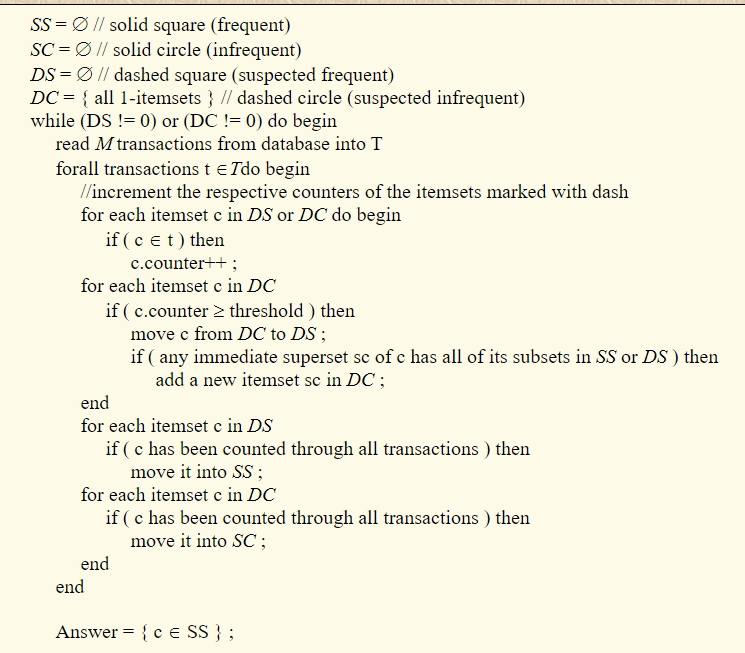



In [108]:
# # from collections import defaultdict
# # from itertools import combinations

# def count_itemsets(itemsets, transactions):
#     counts = defaultdict(int)
#     for itemset in itemsets:
#         for transaction in transactions:
#             if all(item in transaction for item in itemset):
#                 counts[tuple(itemset)] += 1
#     return counts

# def DIC(database, threshold,no_max_itemsets):
#     transactions = database.copy()
#     SS = []  # SOLID SQUARE (FREQUENT)
#     SC = []  # SOLID CIRCLE (INFREQUENT)
#     DS = []  # DASHED SQUARE (SUSPECTED FREQUENT)
#     DC = []  # DASHED CIRCLE (SUSPECTED INFREQUENT)

#     one_itemsets = list(set([item for transaction in transactions for item in transaction]))

#     for item in one_itemsets:
#         DC.append([item])

#     while DS or DC:
#         M = 2  # Define M as needed or set it to the transaction count
#         T = transactions[:M]
#         transactions = transactions[M:]

#         counts = count_itemsets(DS + DC, T)

#         for c in DS + DC:
#             c_count = counts.get(tuple(c), 0)
#             if c_count >= threshold:
#                 DS.append(c)
#                 if c in DC:
#                     DC.remove(c)

#             for item in one_itemsets:
#                 if item in c:
#                     sc = list(set(c + [item]))
#                     subsets = list(combinations(sc, len(sc) - 1))
#                     if all(set(subset) in DS or set(subset) in SS for subset in subsets):
#                         if sc not in DS and sc not in DC:
#                             DC.append(sc)

#         for c in DS.copy():
#             if c_count == len(transactions):
#                 DS.remove(c)
#                 SS.append(c)

#         for c in DC.copy():
#             if c_count == len(transactions):
#                 DC.remove(c)
#                 SC.append(c)

#     unique_elements = list(set(tuple(item) for item in SS))  # To get unique elements
#     unique_frequent_itemsets = sorted(unique_elements, key=lambda x: int(x[0]))


# DIC(transactions_list_sorted[:25], 2, 2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#THE END